# play with full Ibc sample

In [102]:
import sys
sys.path.append('../src')
from ztfanalysis import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [103]:
ztfp = ztfmultiple(datafile='tmp/%s_data.clf',
                   parfile='priors.txt',
                   datadir='/Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/')
ztfp.parse_meta()
ztfp.format_meta()  
ztfp.parse_params()

meta 142 objs


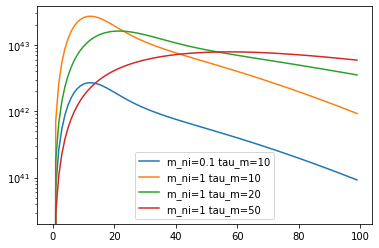

In [86]:
from models import Arnett_fit
times = np.arange(0,100,1)
fig,ax=plt.subplots(1,1)
for m_ni, tau_m in ([.1, 10], [1, 10], [1, 20], [1, 50],):
    flux = Arnett_fit(times, m_ni, tau_m)
    ax.plot(times,flux,'-',label='m_ni=%s tau_m=%s'%(m_ni,tau_m))
ax.legend()
ax.set_yscale('log')

Prepare data in = 0.78 s
Run GP in = 1.01 s
Run Fitting in = 0.01 s
Run early power law fit in = 0.83 s
calc colour in = 1.00 s
est host ebv in = 0.00 s
calc lyman bol in = 0.01 s
reload from /Users/yash0613/Library/CloudStorage/Box-Box/ztf_data/tmp//Arnett1_ZTF19abtsnyy_trf_1.npz
fit arnett model in = 0.01 s
fit tail model in = 0.00 s
get local spectra in = 0.40 s
fit spec modelline in = 7.73 s
plot in = 4.65 s
saved cache


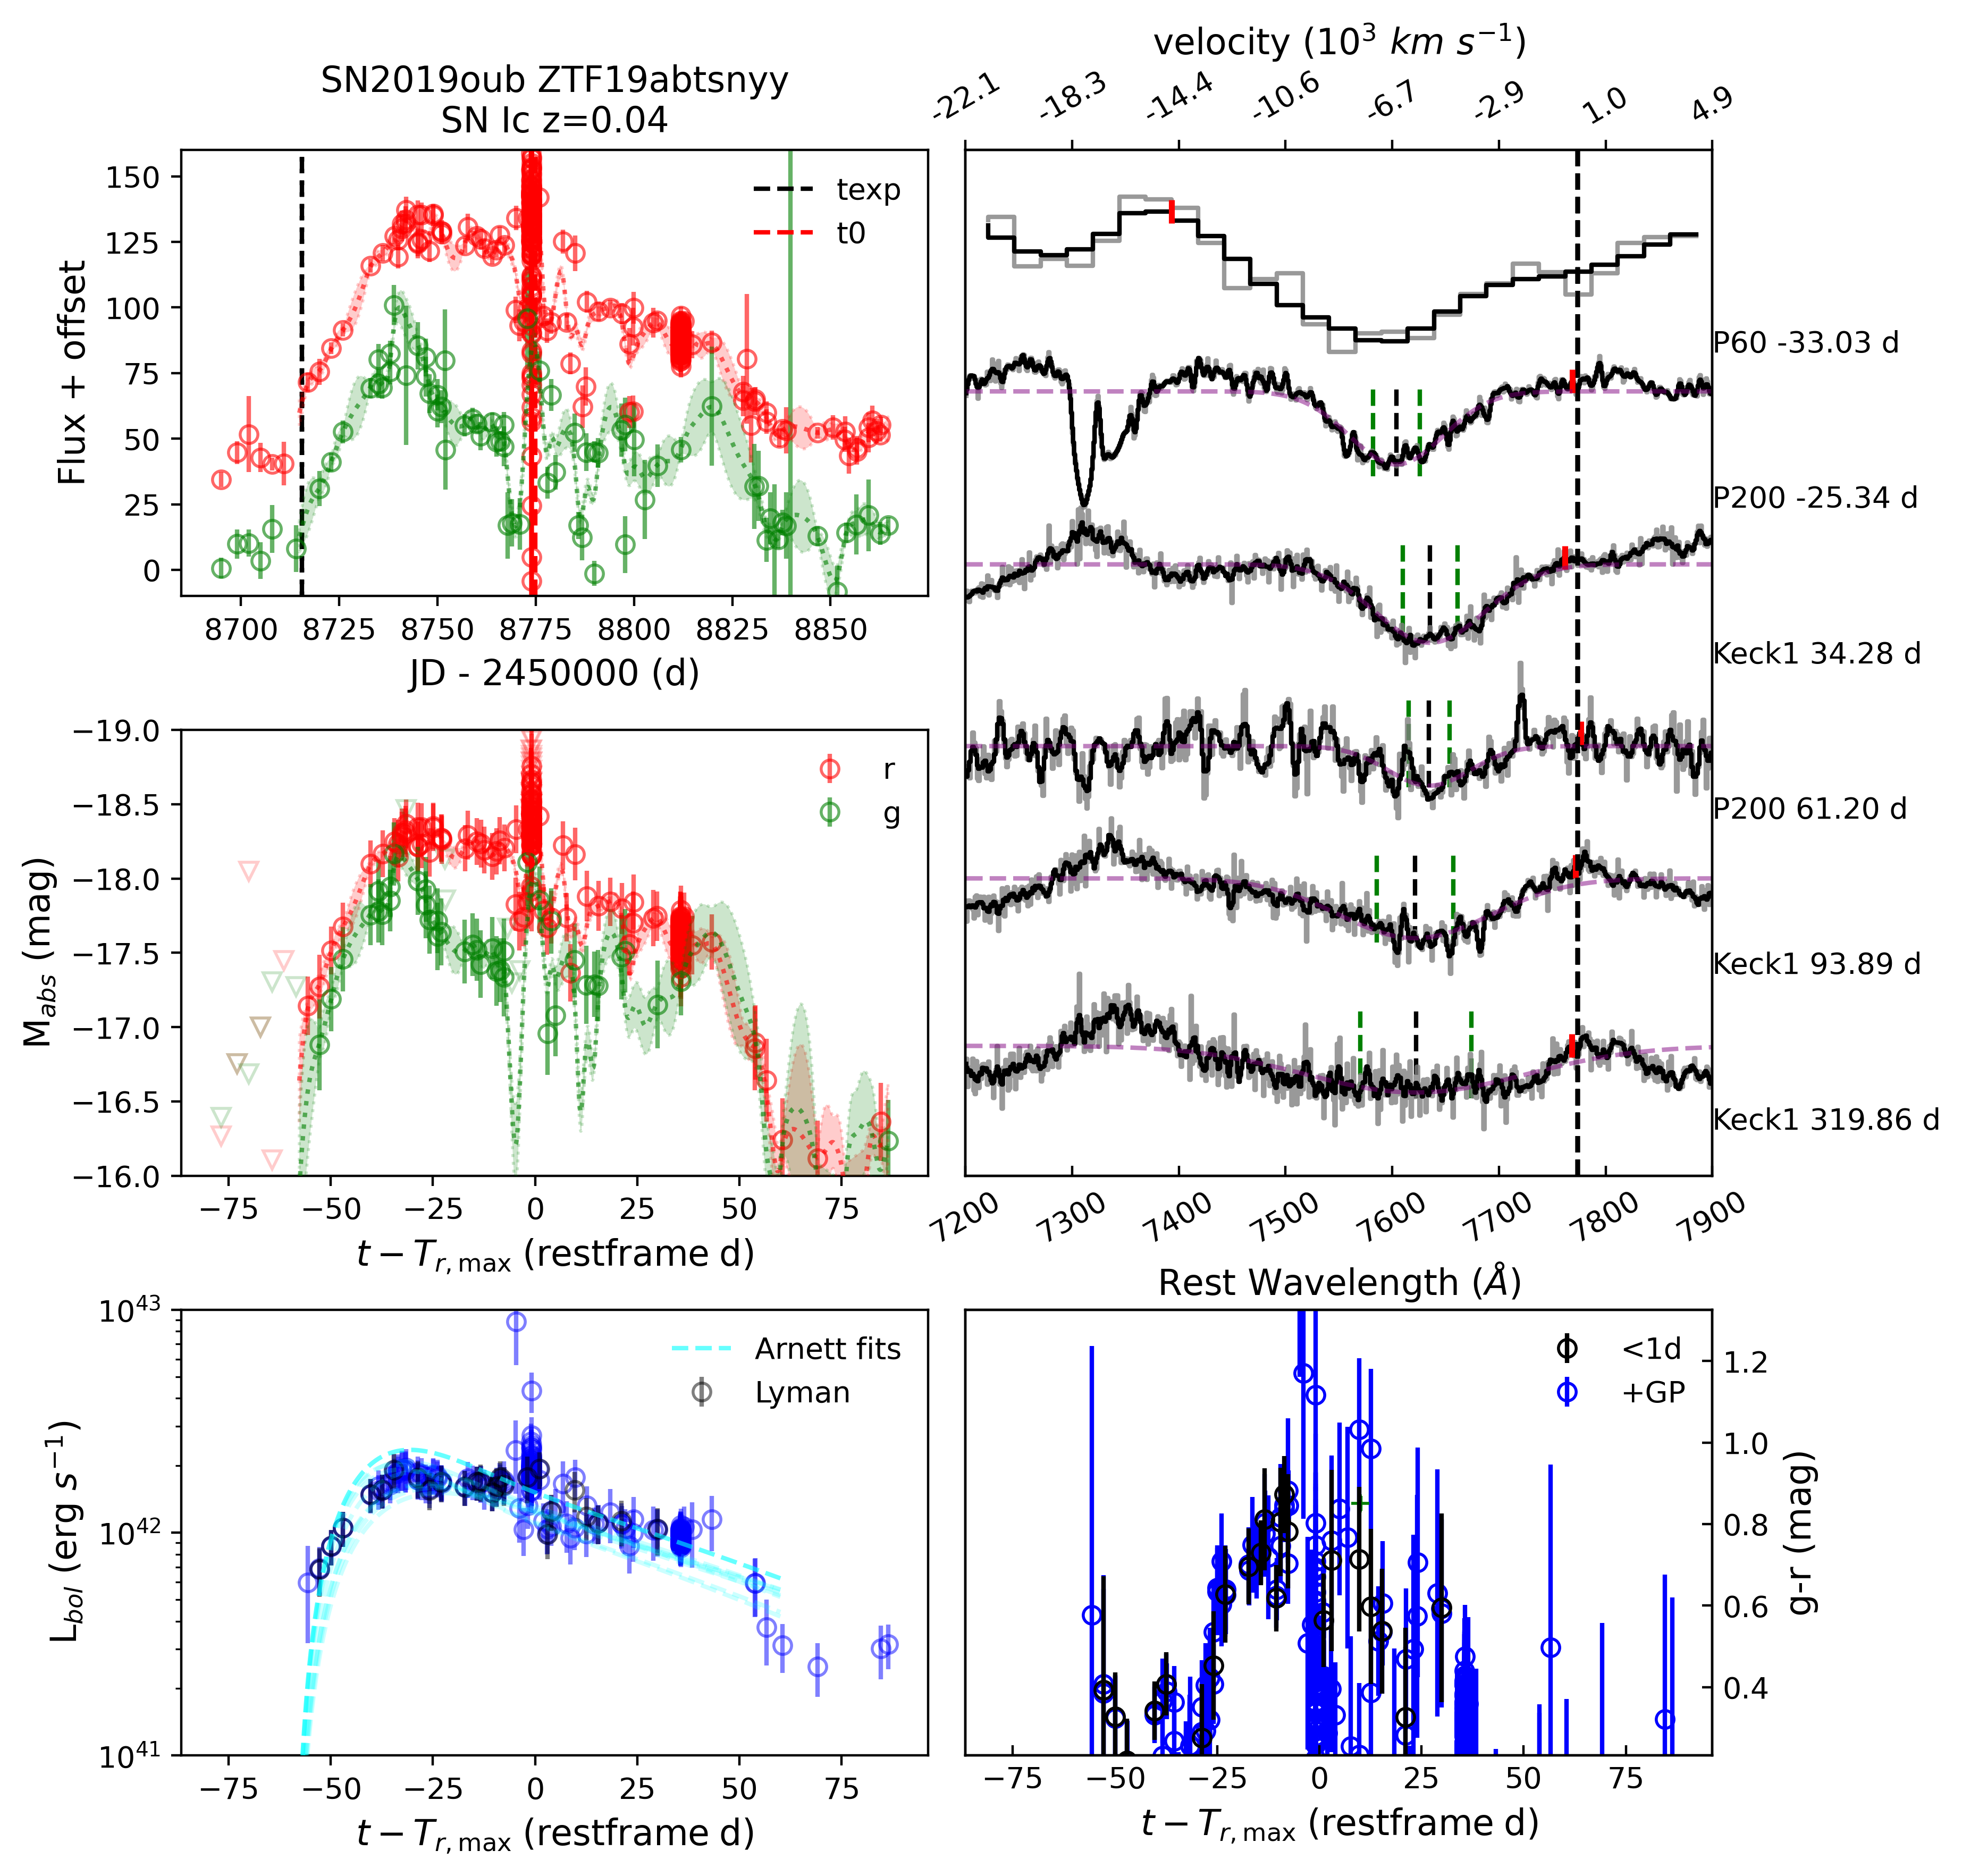

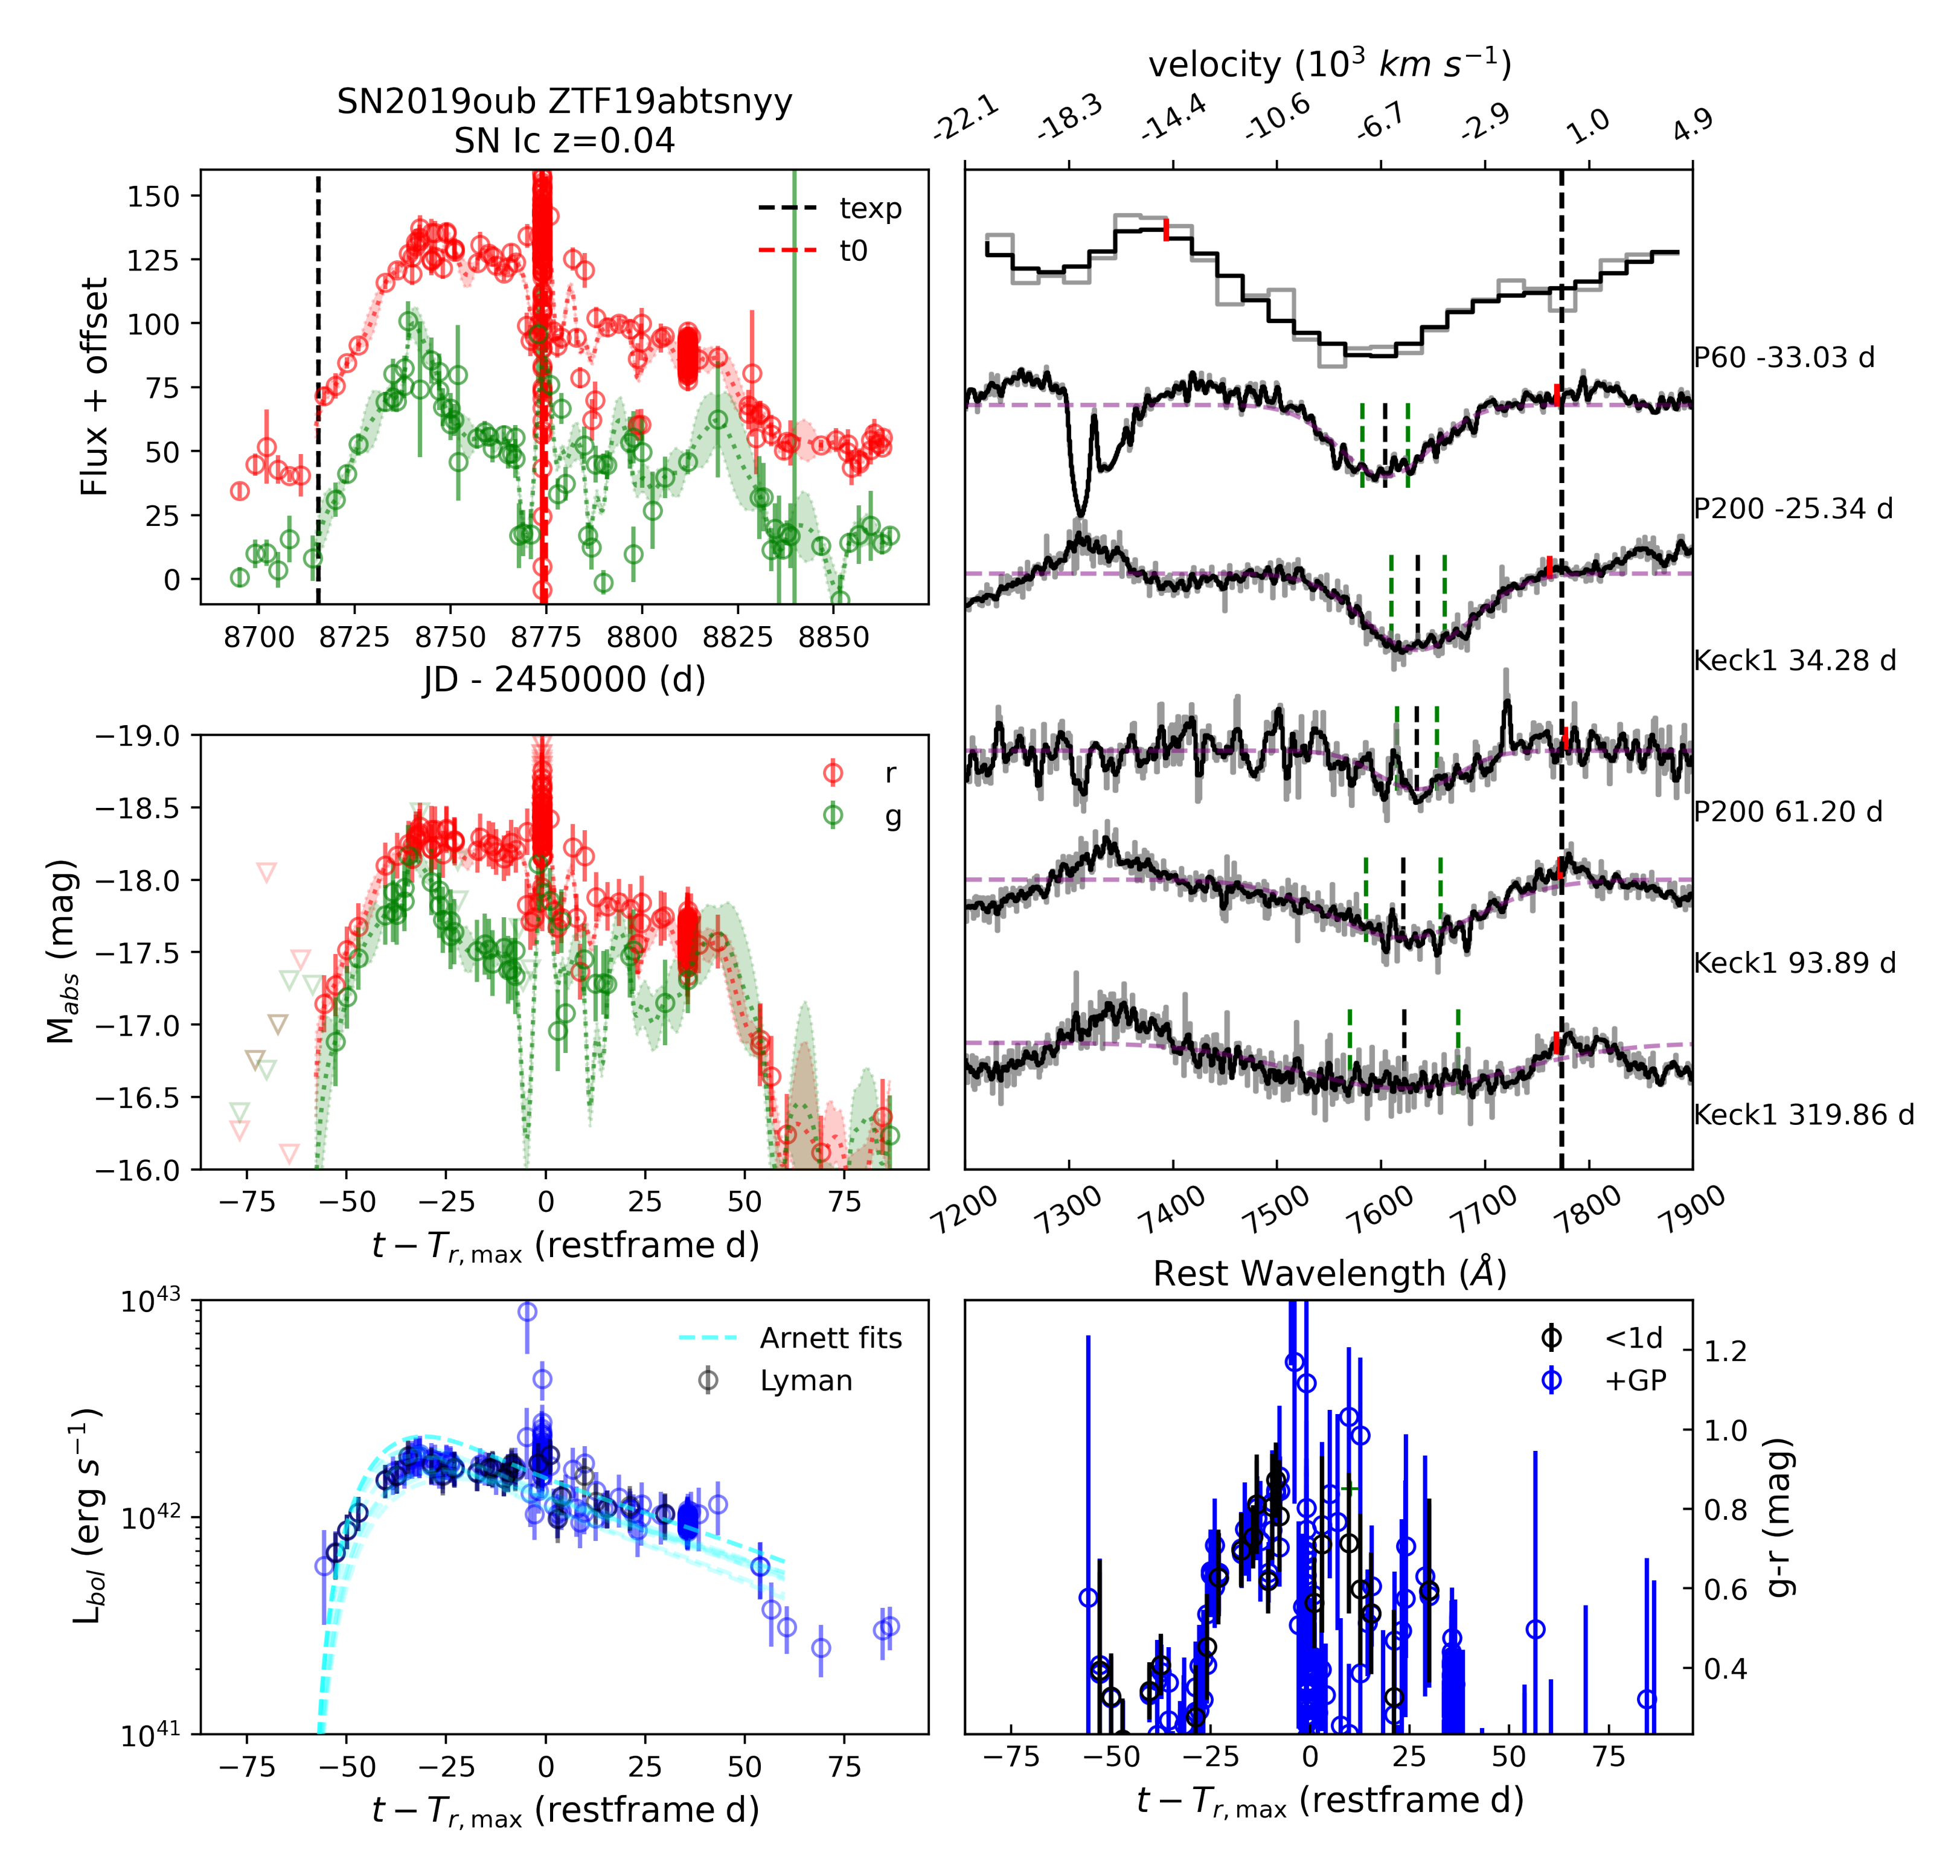

In [106]:
ztfp.parse_params(force=True)
if False:
    ztfp.run(nsn=126, verbose=False, clobber=False, axes=None)
elif True:
    ztfid = 'ZTF19abtsnyy'
    ztfp.run(ztfid=ztfid, verbose=False, clobber=True, axes=None)
    ztfp.data[ztfid].show()
else:
    ztfp.run(verbose=True, clobber=False, axes=False)

In [101]:
for nsn in range(142):
    ztfid = ztfp.meta.index[nsn]
    iauid = ztfp.data[ztfid].iauid
    if ztfid != 'ZTF18abecbks':continue
    z = ztfp.data[ztfid].z
    t0 = ztfp.data[ztfid].t0
    texp = ztfp.data[ztfid].texp
    hostebv = ztfp.data[ztfid].hostebv
    #if hostebv >0:
    #print (ztfid, hostebv)
    
    if 'arnettcls' in ztfp.data[ztfid].__dict__:
        #if ztfp.data[ztfid].arnettcls.get_par()[1][1] > 30:
        print (ztfid, ztfp.data[ztfid].arnettcls.get_par()[1][0], ztfp.data[ztfid].tailcls.get_par()[1][0])
    #if 'tailcls' in ztfp.data[ztfid].__dict__:
    #    print (ztfp.data[ztfid].tailcls.get_par())
    #    __ = ztfp.data[ztfid].arnettcls.get_par()[1]
    #    mni, taum = __[0], __[1]
    #    __ = ztfp.data[ztfid].arnettcls.get_par()[0]
    #    mni_dw, taum_dw = __[0], __[1]
    #    __ = ztfp.data[ztfid].arnettcls.get_par()[2]
    #    mni_up, taum_up = __[0], __[1]
    #    mej, emej, ek, eke = ztfp.data[ztfid].taum_to_EM(vpeak=8, vpeake=1, vopt=1)
        
    #    _str = '%s %s %.2f %.2f %.2f %.3f %.3f %.3f %.2f %.2f %.2f %.2f %.2f %.2f %.2f' % \
    #        (ztfid, iauid, z, t0, texp[1], mni, mni_up, mni_dw, taum, taum_up, taum_dw, mej, emej, ek, eke )
        #print (_str)

ZTF18abecbks 0.15404178608779379 0.08675831302556403


(-10.0, 200.0)

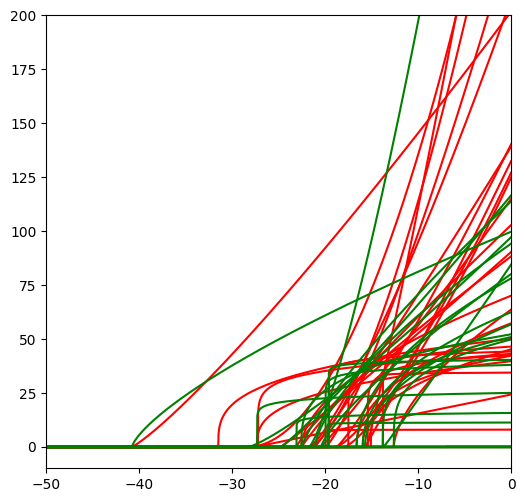

In [70]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showpl('type=="SN Ic"',filt='r',color='r')
ztfplot.showpl('type=="SN Ic"',filt='g',color='g')
ztfplot.ax.set_xlim([-50,0])
ztfplot.ax.set_ylim([-10,200])

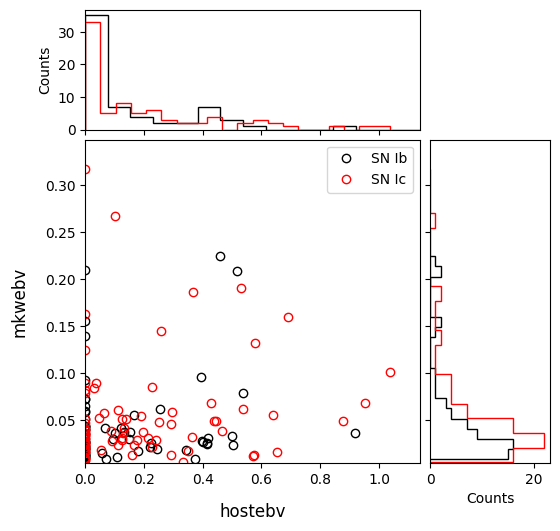

In [36]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.show2d('hostebv', 'mkwebv', 'type=="SN Ib"', ls='', marker='o', fillstyle='none',color='k', label='SN Ib')
ztfplot.show2d('hostebv', 'mkwebv', 'type=="SN Ic"', ls='', marker='o', fillstyle='none',color='r', label='SN Ic')
ztfplot.init_hist_axes()
ztfplot.add_hist('hostebv', 'mkwebv', 'type=="SN Ib"', nbinx=20, nbiny=20, color='k')
ztfplot.add_hist('hostebv', 'mkwebv', 'type=="SN Ic"', nbinx=20, nbiny=20, color='r')
ztfplot.ax.legend()

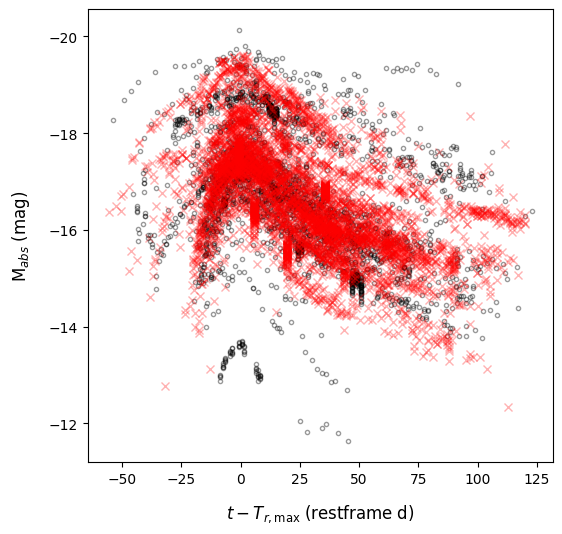

In [71]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showlc('type=="SN Ib"', ls='', marker='.', fillstyle='none',color='k', alpha=.4)
ztfplot.showlc('type=="SN Ic"', ls='', marker='x', fillstyle='none',color='r', alpha=.3)
ztfplot.ax.invert_yaxis()

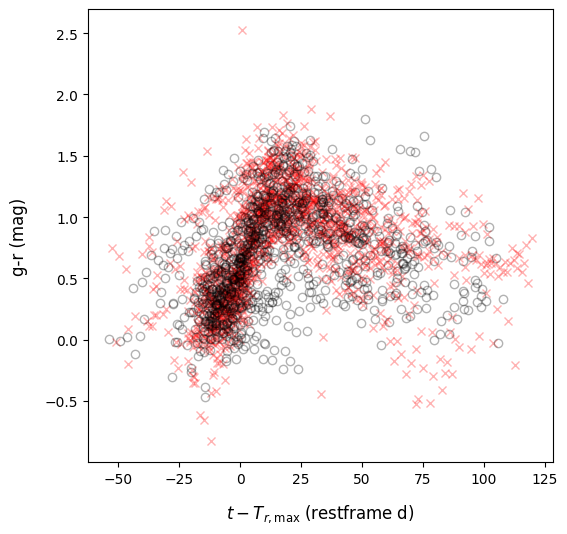

In [72]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showcolor('type=="SN Ic"', ls='', marker='x', fillstyle='none',color='r', alpha=.3)
ztfplot.showcolor('type=="SN Ib"', ls='', marker='o', fillstyle='none',color='k', alpha=.3)

(1e+40, 5e+43)

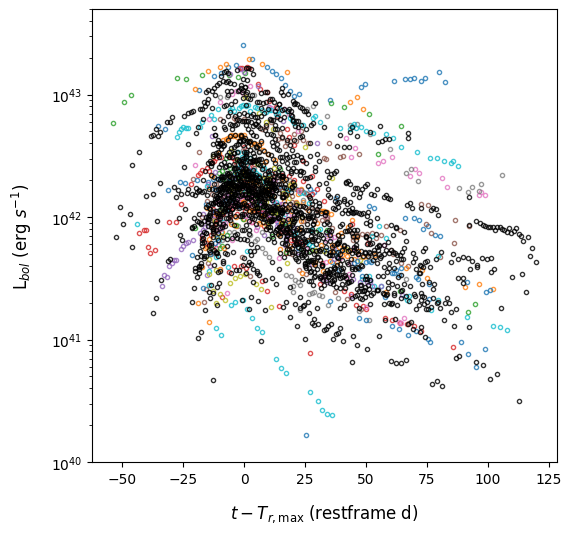

In [73]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showlcbol('type=="SN Ib"', ls='', marker='.', fillstyle='none', alpha=.8)
ztfplot.showlcbol('type=="SN Ic"', ls='', marker='.', fillstyle='none', color='k', alpha=.8)
ztfplot.ax.set_yscale('log')
ztfplot.ax.set_ylim([1e40,5e43])

(-0.1, 1.1)

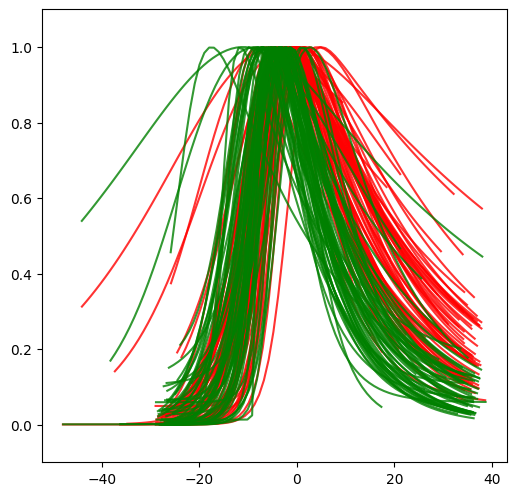

In [74]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showfit('type=="SN Ic"', filt='r', funit='flux', ls='-', marker='', fillstyle='none', color='r', alpha=.8)
ztfplot.showfit('type=="SN Ic"', filt='g', funit='flux', ls='-', marker='', fillstyle='none', color='g', alpha=.8)
ztfplot.ax.set_ylim([-.1,1.1])

(-0.1, 1.1)

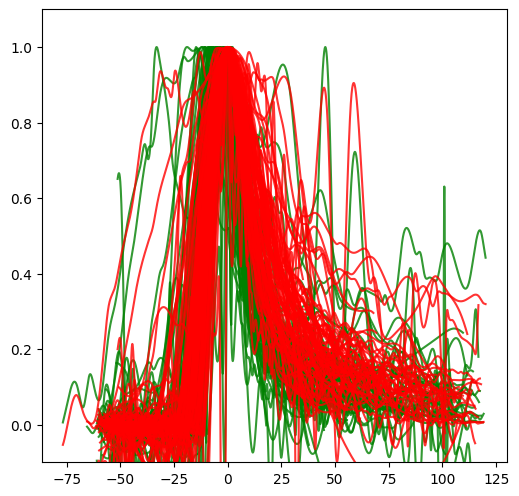

In [75]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showgp('type=="SN Ic"', filt='g', funit='flux', ls='-', marker='', fillstyle='none', color='g', alpha=.8)
ztfplot.showgp('type=="SN Ic"', filt='r', funit='flux', ls='-', marker='', fillstyle='none', color='r', alpha=.8)
ztfplot.ax.set_ylim([-.1,1.1])

(-1.0, 60.0)

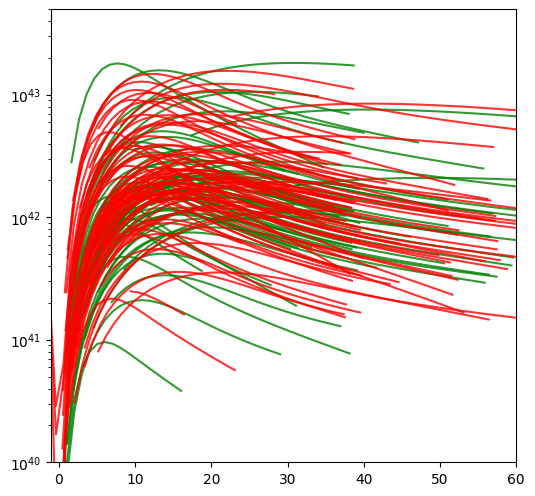

In [76]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showarnett('type=="SN Ib"', ls='-', marker='', fillstyle='none', color='g', alpha=.8)
ztfplot.showarnett('type=="SN Ic"', ls='-', marker='', fillstyle='none', color='r', alpha=.8)
ztfplot.ax.set_yscale('log')
ztfplot.ax.set_ylim([1e40,5e43])
ztfplot.ax.set_xlim([-1,60])

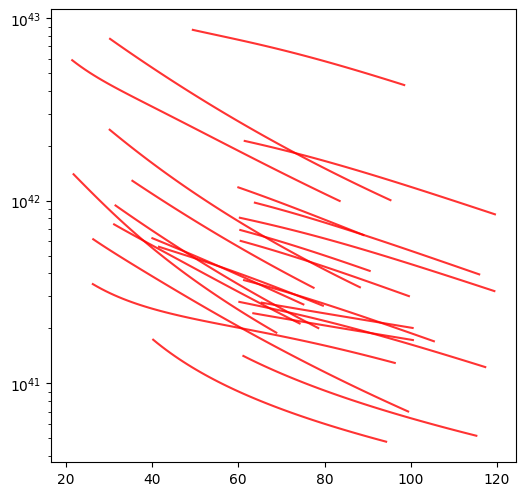

In [81]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showtail('type=="SN Ic"', x_pred=None,
                 ls='-', marker='', fillstyle='none', color='r', alpha=.8)
ztfplot.ax.set_yscale('log')

(-40.0, 100.0)

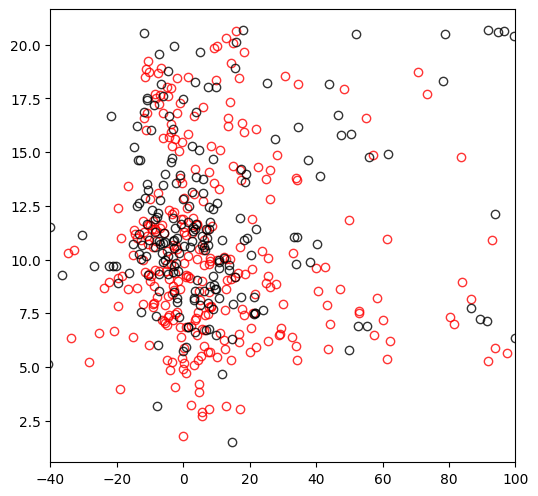

In [78]:
ztfplot = plotter(ztfp)
ztfplot.init_fig()
ztfplot.showvelocity('type=="SN Ic"', ls='', marker='o', fillstyle='none', color='r', alpha=.8)
ztfplot.showvelocity('type=="SN Ib"', ls='', marker='o', fillstyle='none', color='k', alpha=.8)
ztfplot.ax.set_xlim([-40,100])

In [11]:
import os
ztfp.parse_params(force=True)
for nsn in range(142):
    ztfid = ztfp.meta.index[nsn]
    
    #ztfp.run(ztfid=ztfid, verbose=False, clobber=False, axes=None)
    
    t0 = ztfp.data[ztfid].t0
    texp = ztfp.data[ztfid].texp
    iauid = ztfp.data[ztfid].iauid
    z = ztfp.data[ztfid].z
    hostebv = ztfp.data[ztfid].hostebv
    mkwebv = ztfp.data[ztfid].mkwebv
    
    if 'arnettcls' in ztfp.data[ztfid].__dict__: art = ztfp.data[ztfid].arnettcls.get_par()[1]
    else: art = [-99, -99]
    figpath = '{}/{}'.format(ztfp.data[ztfid].kwargs['datadir'], 
                         ztfp.data[ztfid].kwargs['figpath']%ztfp.data[ztfid].ztfid)
    #os.system ('cp %s /Users/yash0613/Downloads/ZTF_Ibc_fittings/fits/' % figpath)
    
    print ('\subsection{%s}\n'%ztfid)
    print ( '%s (%s), z = %.2f, JDpeak = %.2f, trise = %.2f d, MKWebv = %.2f, Hostebv = %.2f, Mni = %.2f Msun, taum = %.2f d' % 
           ( ztfid, iauid, z, t0, texp[1], mkwebv, hostebv, art[0], art[1]))
    print ( '\n\\begin{figure}[H]\n\centering\n\includegraphics[width=.5\\textwidth]{fits/%s.png}\n\caption{}\n\end{figure}'%ztfid )
    print ( '\n\n')
    #break

\subsection{ZTF21abmlldj}

ZTF21abmlldj (SN2021uvy), z = 0.09, JDpeak = 2459450.43, trise = -46.52 d, MKWebv = 0.06, Hostebv = 0.00, Mni = -99.00 Msun, taum = -99.00 d

\begin{figure}[H]
\centering
\includegraphics[width=.5\textwidth]{fits/ZTF21abmlldj.png}
\caption{}
\end{figure}



\subsection{ZTF19abqxibq}

ZTF19abqxibq (SN2019omd), z = 0.08, JDpeak = 2458741.84, trise = -35.00 d, MKWebv = 0.03, Hostebv = 0.00, Mni = 1.55 Msun, taum = 29.22 d

\begin{figure}[H]
\centering
\includegraphics[width=.5\textwidth]{fits/ZTF19abqxibq.png}
\caption{}
\end{figure}



\subsection{ZTF19abcegvm}

ZTF19abcegvm (SN2019jyn), z = 0.07, JDpeak = 2458720.65, trise = -57.71 d, MKWebv = 0.04, Hostebv = 0.00, Mni = -99.00 Msun, taum = -99.00 d

\begin{figure}[H]
\centering
\includegraphics[width=.5\textwidth]{fits/ZTF19abcegvm.png}
\caption{}
\end{figure}



\subsection{ZTF19aapwnmb}

ZTF19aapwnmb (SN2019dgw), z = 0.10, JDpeak = 2458586.67, trise = -6.84 d, MKWebv = 0.06, Hostebv = 0.00, Mni = 0.48 Msun,